The goal of this project is to find the most suitable model for predicting the student performance on test based on diffent data such as
- Hours studied
- Attendance
- Parental Involvment
- Access to resources
- Extra Activities
- Previous scores
- Motivation Level
- Internet Access
- Tutorin Sessions
- Family income
- Teacher Quality
- School type
- Peer influence
- Physical activity
-	Learning disabilities
- Parental education level
-	Distance from home
-	Gender

In [ ]:
import pandas as pd

df_final = pd.read_csv("StudentPerformanceFactors.csv", sep=',', decimal=',')
df_final.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Our first goal is to clear the dataset and make it ready for data processing.
print(df_final.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
# We fill these columns with data that have sense
df_final['Teacher_Quality'] = df_final['Teacher_Quality'].fillna('Medium')
df_final['Distance_from_Home'] = df_final['Distance_from_Home'].fillna('Moderate')

# Others we drop since we did not found any meaningfull replacement
df_final = df_final.dropna(subset=['Parental_Education_Level']).dropna()

In [ ]:
# We make sure we don't have any missing data once more.
print(df_final.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Since we have finished the first step, processing the data we can try to get some meaningfull data from this dataset.

This graphs shows us that better exam score have students that come from high family income. It is strongly tied to the more number of private tutoring they had. This data tells us that the high family income students probably had better quality tutors.

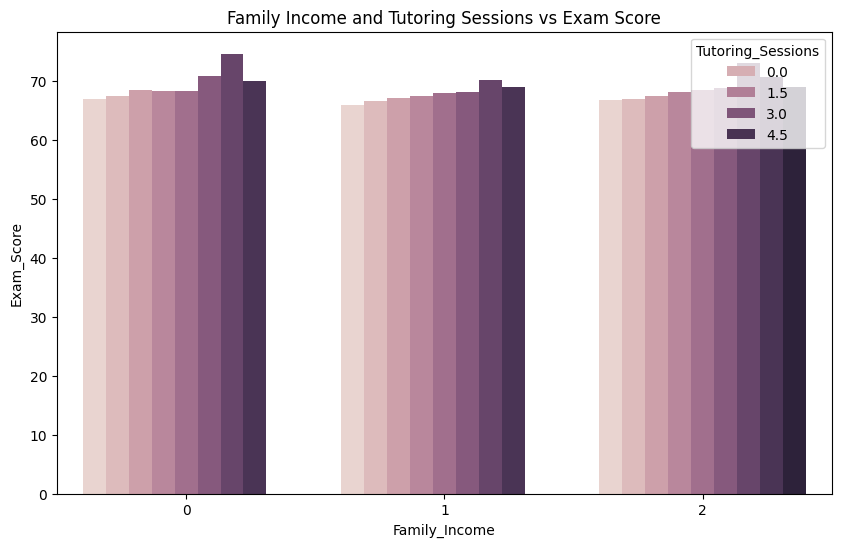

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
grouped = df_final.groupby(['Family_Income', 'Tutoring_Sessions'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Family_Income', y='Exam_Score', hue='Tutoring_Sessions')
plt.title('Family Income and Tutoring Sessions vs Exam Score')
plt.show()

This graphs shows us sleep hours by gender compared to their exam score.
As we can see from the graph. We can conclude that female students had much better results on less hours of sleep on average. However male students tend to beat female students if they get enough sleep.

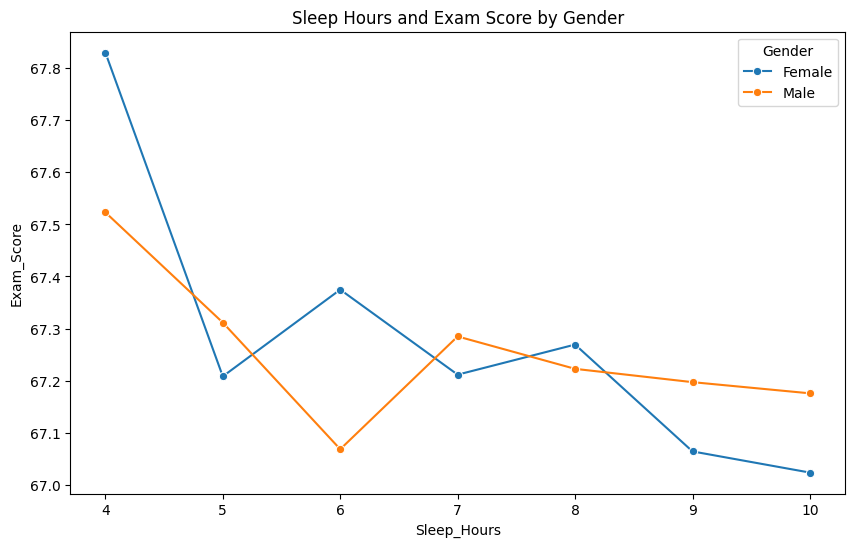

In [ ]:
grouped = df_final.groupby(['Sleep_Hours', 'Gender'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Sleep_Hours', y='Exam_Score', hue='Gender', marker='o')
plt.title('Sleep Hours and Exam Score by Gender')
plt.show()

This graphs tells us that the decision makers on the final exams score is between hours studied and attendance.

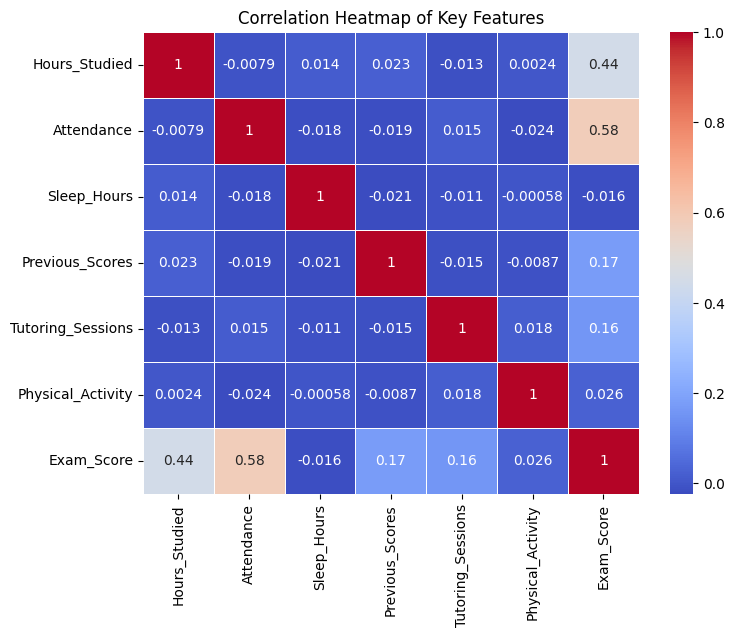

In [ ]:
numerical_features = df_final.select_dtypes(include=['int64', 'float64']).columns
correlation = df_final[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()


This graphs shows us how learning disabilities influence students on exam scores. It shows us that on average, students with learning disabilities have more chance to be in the lower score range. While also beating students without learning disabilities in the high score range. Which is a very interesting fact we got from this dataset.

<ipython-input-10-f5b944c408d0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_final.groupby(['Learning_Disabilities', 'Score_Range']).size().unstack(fill_value=0)


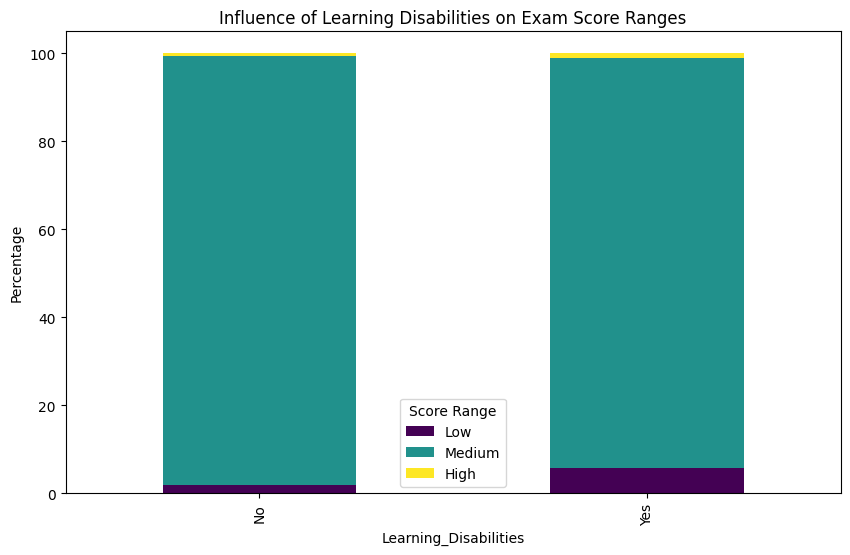

In [ ]:
df_final['Score_Range'] = pd.cut(df_final['Exam_Score'], bins=[0, 60, 80, 100],
                                 labels=['Low', 'Medium', 'High'])

grouped = df_final.groupby(['Learning_Disabilities', 'Score_Range']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Influence of Learning Disabilities on Exam Score Ranges')
plt.ylabel('Percentage')
plt.legend(title='Score Range')
plt.show()

Box Plot that shows us numbers in boxplots based on extracurricular activities.
We can conclude that on average, students who aprticipate in extra activities tend to have higher results on every metric. Meaning they are better on average, they have less underperforming students, more better performing students, and their upper value for 75th percentile is higher.

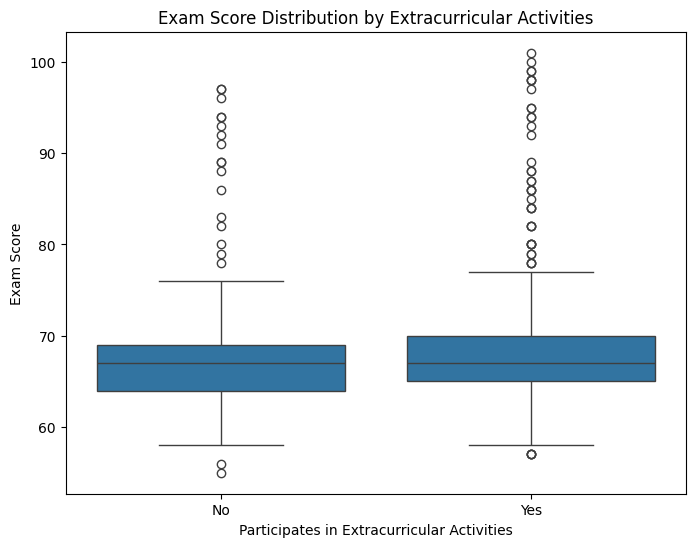

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df_final)
plt.title('Exam Score Distribution by Extracurricular Activities')
plt.xlabel('Participates in Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()

Heatmap that shows us the correation between attendance, and parental involment and how it influences the final exam score.
What we can conclude from here is that parental involvement does influence students decision to attend more classes, which also shows better performance on the final exams. Those students tend to have better grades on average.

<ipython-input-12-30bb6a63e450>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_final.pivot_table(values='Exam_Score',


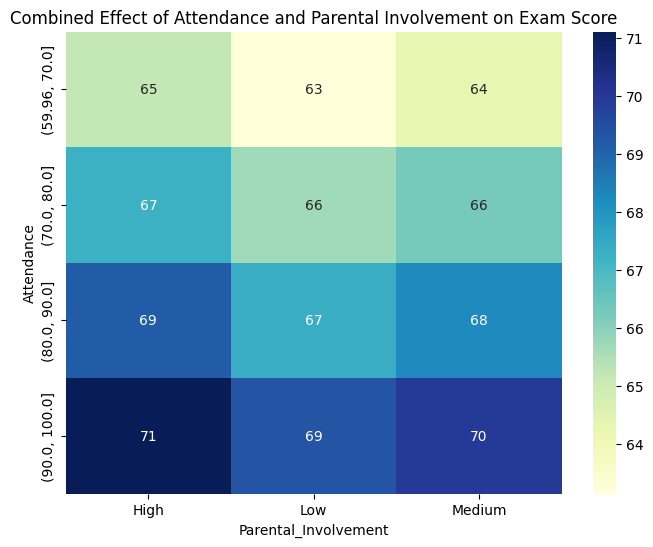

In [ ]:
pivot = df_final.pivot_table(values='Exam_Score',
                             index=pd.cut(df_final['Attendance'], bins=4),
                             columns='Parental_Involvement',
                             aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Combined Effect of Attendance and Parental Involvement on Exam Score')
plt.show()


This Graph shows us how numerical data is grouped by different groups.
We can conlude that students that are studying far from home tend to be more similar to eachother, since their interquatile range is wide and they do not have much top performing students like we have on moderate and near home students.
We can also see that school type does influence only those that have moderate and far distance from home.

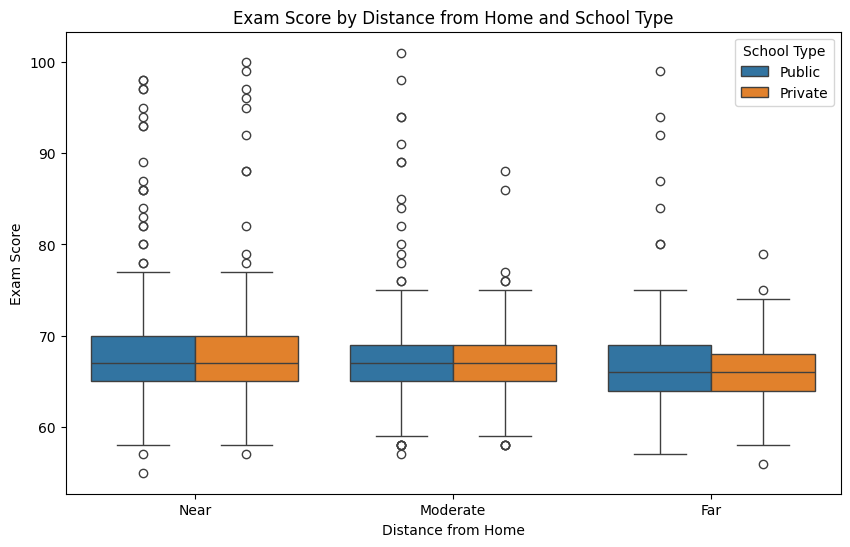

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance_from_Home', y='Exam_Score', hue='School_Type', data=df_final)
plt.title('Exam Score by Distance from Home and School Type')
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.legend(title='School Type')
plt.show()


This graphs shows us the distance from home vs family income looking against exam scores. It can tell us that distance from home and family income is relativly correlated and that students that are far from home tend to have smaller family income which lead for lower average exam score.

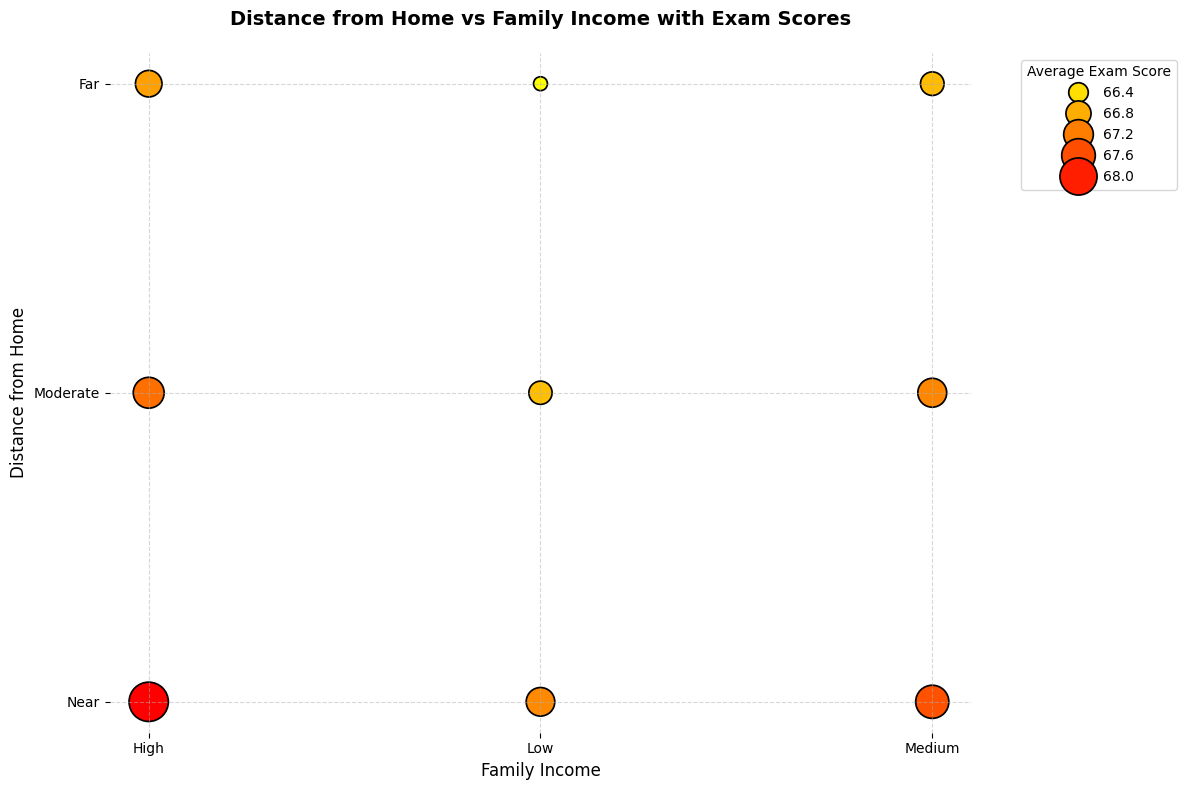

In [ ]:
grouped = df_final.groupby(['Distance_from_Home', 'Family_Income'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(12, 8))
bubble_sizes = grouped['Exam_Score'] * 7

from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_redyellow", ["yellow", "red"], N=100)

sns.scatterplot(x='Family_Income', y='Distance_from_Home', size='Exam_Score', sizes=(100, 800),
                hue='Exam_Score', data=grouped, palette=custom_cmap, legend="brief", edgecolor='black')

plt.title('Distance from Home vs Family Income with Exam Scores', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Family Income', fontsize=12)
plt.ylabel('Distance from Home', fontsize=12)

legend = plt.legend(title='Average Exam Score', bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.texts:
    text.set_fontsize(10)

plt.grid(True, linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)  # Remove unnecessary spines
plt.tight_layout()

plt.show()

We turn categorical numbers to numerical using label encoder.
And we standardize the numerical columns.

In [ ]:
# Dropamo izhodni podatek
izhod_column_name = 'Exam_Score'
izhod_column = df_final[izhod_column_name]
df_final = df_final.drop(columns=izhod_column_name)

categorical_columns = df_final.select_dtypes(include=['object']).columns
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Pretvaramo kategoricne podatke v stevilske
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_final[column] = label_encoder.fit_transform(df_final[column])

# Standardiziramo numericne stevilke
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

# Damo nazaj izhod column
df_final = pd.concat([df_final, izhod_column], axis=1)

df_final.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.506676,0.348560,1,0,0,-0.021533,-0.145108,1,1,-1.213157,1,2,1,2,0.029657,0,1,2,1,67
1,-0.161307,-1.383082,1,2,0,0.659685,-1.117448,1,1,0.409115,2,2,1,0,1.000879,0,0,1,0,61
2,0.673671,1.560710,2,2,1,-0.021533,1.105043,2,1,0.409115,2,2,1,1,1.000879,0,2,2,1,74
3,1.508650,0.781471,1,2,1,0.659685,1.591213,2,1,-0.402021,2,2,1,0,1.000879,0,1,1,1,71
4,-0.161307,1.041217,2,2,1,-0.702751,-0.700731,2,1,1.220252,2,0,1,1,1.000879,0,0,2,0,70


Clustering.

We do the elbow method and we can conclude that the best number for K is going to be 4 or 5.

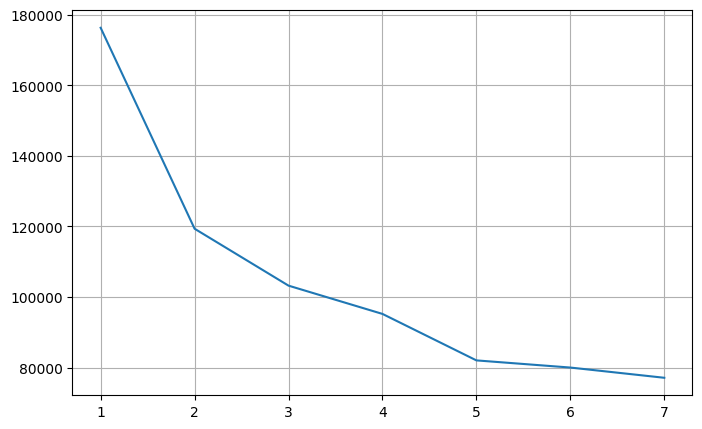

In [ ]:
# Grucenje

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

X_hierarchical = df_final.copy()
X_dbscan = df_final.copy()
X_kmeans = df_final.copy()

wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), wcss, linestyle='-')
plt.grid()
plt.show()

KMeans algorithm plotted with PCA

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


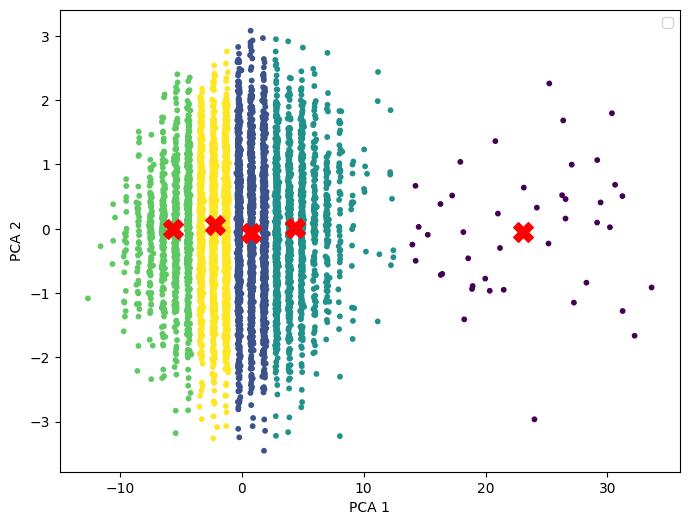

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_kmeans)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_kmeans)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X')

plt.legend()
plt.show()

Mean shift clustering (Hill clustering)

Mean Shift Silhouette Score: 0.244


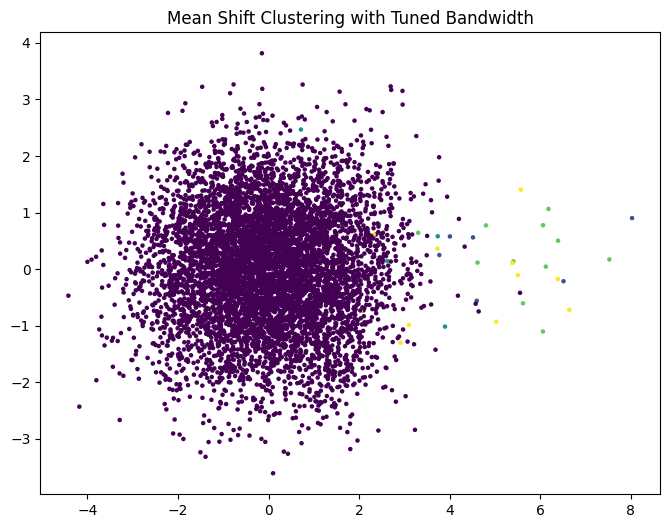

In [ ]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_kmeans)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(data_scaled)

from sklearn.cluster import MeanShift

# Perform Mean Shift with estimated bandwidth
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(data_scaled)

# Silhouette Score
mean_shift_silhouette = silhouette_score(data_scaled, mean_shift_labels)
print(f"Mean Shift Silhouette Score: {mean_shift_silhouette:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_shift_labels, cmap='viridis', s=5)
plt.title("Mean Shift Clustering with Tuned Bandwidth")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,
    r2_score, explained_variance_score, max_error
)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterSampler
import seaborn as sns
from scipy.stats import uniform, randint

In [ ]:
# Split the data
X = df_final.drop('Exam_Score', axis=1)
y = df_final['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=679)

General testing of all models

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


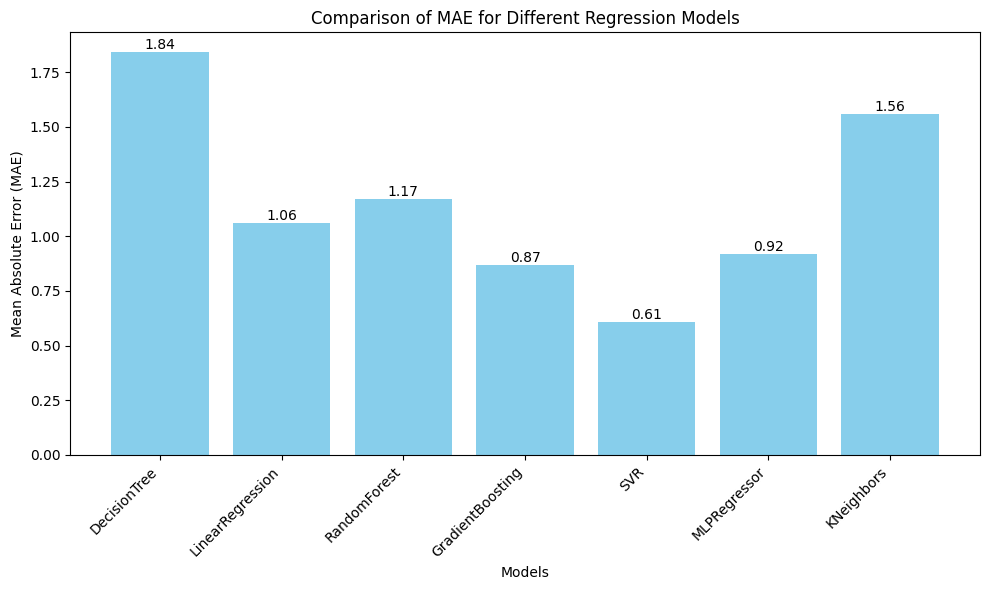

In [35]:
# Define models to test
# We want to find the most suitable general models for us.
models = {
    "DecisionTree": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=679),
    "GradientBoosting": GradientBoostingRegressor(random_state=679),
    "SVR": SVR(),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=679),
    "KNeighbors": KNeighborsRegressor()
}

# Iterate through models to find the best one
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        "MAE": round(mean_absolute_error(y_test, predictions), 2),
        "MSE": round(mean_squared_error(y_test, predictions), 2),
        "MAPE": round(mean_absolute_percentage_error(y_test, predictions) * 100, 2),
        "R^2": round(r2_score(y_test, predictions), 2),
        "Explained Variance": round(explained_variance_score(y_test, predictions), 2),
        "Max Error": round(max_error(y_test, predictions), 2)
    }

model_names = list(results.keys())
mae_values = [results[model]["MAE"] for model in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Stacking more models and combining their results

<ipython-input-15-b5d2e9fab659>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=mse_df, palette="viridis")


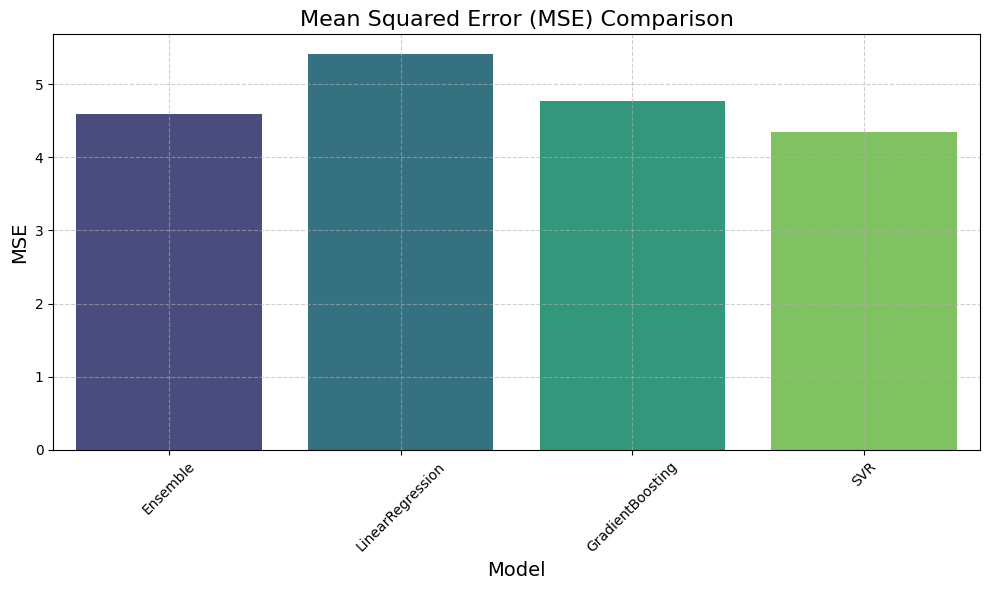

In [ ]:
# Ensamble method, combining three models
models = {
    "LinearRegression": LinearRegression(),
    "GradientBoosting": GradientBoostingRegressor(random_state=679),
    "SVR": SVR()
}

ensemble_predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    ensemble_predictions[name] = model.predict(X_test)

combined_predictions = np.mean(
    np.column_stack(list(ensemble_predictions.values())), axis=1
)

ensemble_results = {
    "MAE": round(mean_absolute_error(y_test, combined_predictions), 2),
    "MSE": round(mean_squared_error(y_test, combined_predictions), 2),
    "MAPE": round(mean_absolute_percentage_error(y_test, combined_predictions) * 100, 2),
    "R^2": round(r2_score(y_test, combined_predictions), 2),
    "Explained Variance": round(explained_variance_score(y_test, combined_predictions), 2),
    "Max Error": round(max_error(y_test, combined_predictions), 2),
}

individual_results = {}
for model_name, predictions in ensemble_predictions.items():
    metrics = {
        "MAE": round(mean_absolute_error(y_test, predictions), 2),
        "MSE": round(mean_squared_error(y_test, predictions), 2),
        "MAPE": round(mean_absolute_percentage_error(y_test, predictions) * 100, 2),
        "R^2": round(r2_score(y_test, predictions), 2),
        "Explained Variance": round(explained_variance_score(y_test, predictions), 2),
        "Max Error": round(max_error(y_test, predictions), 2),
    }
    individual_results[model_name] = metrics

# Combine all results into a DataFrame
all_results = {
    "Ensemble": ensemble_results,
    **individual_results
}

# Extract MSE values for each model
mse_values = {model: results["MSE"] for model, results in all_results.items()}

mse_df = pd.DataFrame(list(mse_values.items()), columns=["Model", "MSE"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=mse_df, palette="viridis")

plt.title("Mean Squared Error (MSE) Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Voting regressor

In [ ]:
# Voting regressor, combining more models, giving them opportunity to vote for the final result between eachother
voting = VotingRegressor([
    ('SVR', SVR(kernel='rbf', C=100, epsilon=0.1)),
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ('extra_trees', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('mlp', MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42))
])

voting.fit(X_train, y_train)
predictions = voting.predict(X_train)

mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_train, predictions)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse, 2)}")
print(f"R² Score: {round(r2, 2)}")

Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 2.54
Root Mean Squared Error (RMSE): 1.59
R² Score: 0.84


Searching the best parameters for SVR since we concluded that it is the most suitable model for the data

In [ ]:
params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

svr = SVR()
grid = GridSearchCV(svr, params, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

predictions = best_model.predict(X_test)
print(f"MAE: {round(mean_absolute_error(y_test, predictions), 2)}")

Best parameters for SVR

In [ ]:
# This is the best version of SVR (Best parameters)
svr = SVR(C=10, epsilon=0.1, kernel='rbf')
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {round(mae, 2)}")

MAE: 0.52


We try to boost the performance of SVR by bagging the SVR with its best performing parameters to achieve highest possible result

In [ ]:
# Define the parameter grid and try to find best parameters for bagging reggressor
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [1.0],
    'max_features': [0.75, 1.0],
    'bootstrap': [True],
    'estimator__C': [10, 100],
    'estimator__epsilon': [0.1, 0.2],
    'estimator__gamma': ['scale', 0.1]
}

# Create a parameter grid
grid = list(ParameterGrid(param_grid))

best_score = float('inf')
best_params = None

for params in grid:
    # Set up the model with current parameters
    bagging = BaggingRegressor(
        estimator=SVR(kernel='rbf', C=params['estimator__C'], epsilon=params['estimator__epsilon'], gamma=params['estimator__gamma']),
        n_estimators=params['n_estimators'],
        max_samples=params['max_samples'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )

    bagging.fit(X_train, y_train)
    predictions = bagging.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)

    if mae < best_score:
        best_score = mae
        best_params = params

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {round(best_score, 2)}")

KeyboardInterrupt: 

By Bagging the SVR regressor we achieved even better performance of 0.37 MAE

In [36]:
# Best parameters for baggin regressor
bagging = BaggingRegressor(
    estimator=SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'),
    n_estimators=50,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_train)

# Evaluate
mae = mean_absolute_error(y_train, bagging_predictions)
mse = mean_squared_error(y_train, bagging_predictions)
rmse = mse ** 0.5
r2 = r2_score(y_train, bagging_predictions)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse, 2)}")
print(f"R² Score: {round(r2, 2)}")

Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 3.97
Root Mean Squared Error (RMSE): 1.99
R² Score: 0.74


We got really good results here by bagging.
Improving the model up to 0.37 MAE
Lets try to boost this even more
We will use our Bagging SVR Regressor as a foundation to continue

We will refine the prediction model using residal correction

Residal correction shows us the difference between true values (y_ train) and bagging_predictions

We then train the neural network on residuals so it learns to predict errors made by initial model.

In [25]:
from sklearn.neural_network import MLPRegressor

# Calculate residuals
residuals = y_train - bagging_predictions

# Train neural network on residuals
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn.fit(X_train, residuals)

# Refine predictions
nn_residuals = nn.predict(X_train).ravel()
final_predictions = predictions + nn_residuals

# Re-evaluate refined model
mae_final = mean_absolute_error(y_train, final_predictions)
mse_final = mean_squared_error(y_train, final_predictions)
rmse_final = mse_final ** 0.5
r2_final = r2_score(y_train, final_predictions)

print(f"Refined Mean Absolute Error (MAE): {round(mae_final, 2)}")
print(f"Refined Mean Squared Error (MSE): {round(mse_final, 2)}")
print(f"Refined Root Mean Squared Error (RMSE): {round(rmse_final, 2)}")
print(f"Refined R² Score: {round(r2_final, 2)}")


Refined Mean Absolute Error (MAE): 0.25
Refined Mean Squared Error (MSE): 0.14
Refined Root Mean Squared Error (RMSE): 0.37
Refined R² Score: 0.99


Then to demonstrate the achievement we will declare our own Model that basically uses the combination of these.

We take the SVR with best params, we implement bagging regressor to boost the performance.

We implement Neural Network and when we learn the model we always
1. Fit the bagging reggressor
2. Take the bagging predictions
3. Take residuals (real values - bagging predictions)
4. Then we fit the the model on train data

5. When we predict the score of the model we then introduce the neural network residuals
6. Upon predicting we get the bagging SVR prediction and sum it with residual we get from neural network.

In [37]:
class BaggingWithNNRefiner:
    def __init__(self, bagging_params=None, nn_params=None):
        # Initialize Bagging Regressor
        self.bagging_params = bagging_params if bagging_params else {
            'estimator': SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'),
            'n_estimators': 50,
            'max_samples': 1.0,
            'max_features': 1.0,
            'bootstrap': True,
            'random_state': 42
        }
        self.bagging = BaggingRegressor(**self.bagging_params)

        # Initialize Neural Network
        self.nn_params = nn_params if nn_params else {
            'hidden_layer_sizes': (50, 50),
            'activation': 'relu',
            'solver': 'adam',
            'max_iter': 1000,
            'random_state': 42
        }
        self.nn = MLPRegressor(**self.nn_params)

    def fit(self, X_train, y_train):
        # Fit Bagging Regressor
        self.bagging.fit(X_train, y_train)

        # Predict residuals
        bagging_predictions = self.bagging.predict(X_train)
        residuals = y_train - bagging_predictions

        # Fit Neural Network on residuals
        self.nn.fit(X_train, residuals)

    def predict(self, X):
        # Predict with Bagging Regressor
        bagging_predictions = self.bagging.predict(X)

        # Predict residuals with Neural Network
        nn_residuals = self.nn.predict(X).ravel()

        # Combine predictions
        return bagging_predictions + nn_residuals

    def evaluate(self, X, y):
        # Predict using the combined model
        predictions = self.predict(X)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y, predictions)
        mse = mean_squared_error(y, predictions)
        rmse = mse ** 0.5
        r2 = r2_score(y, predictions)

        return {
            'mae': round(mae, 2),
            'mse': round(mse, 2),
            'rmse': round(rmse, 2),
            'r2': round(r2, 2)
        }


We implement our new hybrid model

In [38]:
model = BaggingWithNNRefiner()
model.fit(X_train, y_train)

final_metrics = model.evaluate(X_train, y_train)
print(final_metrics)

{'mae': 0.25, 'mse': 0.14, 'rmse': 0.37, 'r2': 0.99}


We plot our findings.

The conclusion is that with a lot of tuning and correcting we managed to create the best algorithm by custom bagging SVR with fine tuning parameters and combining it with neural network residuals. Making our model much better performant than any other combination we tried.

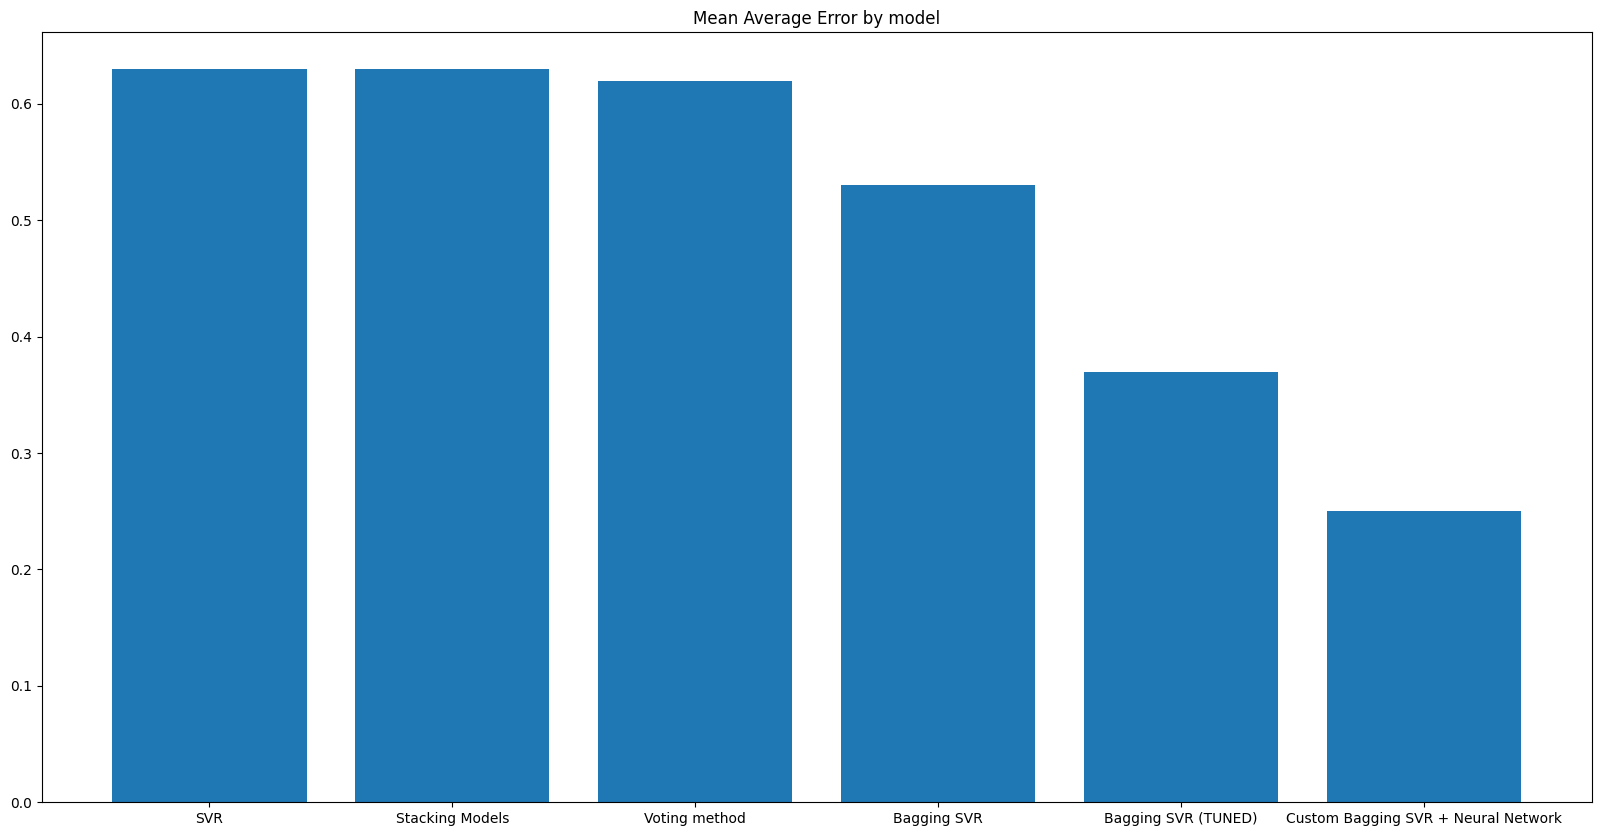

In [47]:
final_graph_labels = ['SVR','Stacking Models', 'Voting method', 'Bagging SVR', 'Bagging SVR (TUNED)', 'Custom Bagging SVR + Neural Network']
final_graph_values = [0.63, 0.63, 0.62, 0.53, 0.37, 0.25]

# Adjust figure size for wider graph
plt.figure(figsize=(20, 10))

plt.title('Mean Average Error by model')
plt.bar(final_graph_labels, final_graph_values)
plt.show()